<a href="https://colab.research.google.com/github/YavuzKahraman/gaih-students-repo-example/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing packages
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
rows, cols = 28, 28

In [5]:
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

In [6]:
# normalizing data
x_train=x_train.astype("float32")
x_train = x_train / 255.0
x_test=x_test.astype("float32")
x_test = x_test / 255.0

# one hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [7]:
input_shape = (rows, cols, 1)


In [8]:
def build_lenet(input_shape):
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5),strides=(1,1),activation='tanh', input_shape=input_shape))
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5),strides=(1,1),activation='tanh'))
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.0,decay=0.0), metrics=['accuracy'])
  return model 

In [9]:
lenet = build_lenet(input_shape)
epochs=10
history=lenet.fit(x_train,y_train,epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
469/469 [==============================] - 32s 3ms/step - loss: 0.7309 - accuracy: 0.7915
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1902 - accuracy: 0.9435
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9623
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0945 - accuracy: 0.9713
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9782
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9823
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0555 - accuracy: 0.9834
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9847
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0427 - accuracy: 0.9872
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.988

In [10]:
loss, acc = lenet.evaluate(x_test,y_test)
print("accuracy:", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9852
accuracy: 0.9851999878883362


In [11]:
x_train = x_train.reshape(x_train.shape[0], 28,28)
print("Training Data", x_train.shape, y_train.shape)

Training Data (60000, 28, 28) (60000, 10)


In [12]:
x_test=x_test.reshape(x_test.shape[0], 28,28)
print("test data", x_test.shape,y_test.shape)

test data (10000, 28, 28) (10000, 10)


1


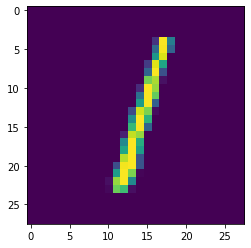

In [16]:
# example image
img_index = 2
plt.imshow(x_test[img_index].reshape(28,28))

pred=lenet.predict(x_test[img_index].reshape(1, rows, cols,1))
print(pred.argmax())